In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
def read_data(score_files):
    df=pd.DataFrame()
    for score_file in score_files:
        df_i = pd.read_csv(
            score_file, # file name
            delim_whitespace=True, # columns are separated by spaces
            skiprows=[0] # skip first line/
        )
        df.head()
        #df_i['score_file'] = score_file[-17]
        df=df.append(df_i)
        del df['SCORE:']
        
        df['name'] = df['description']
        df = df[pd.notnull(df['name'])]
        df.set_index('description', inplace=True)
        df['bundle_len'] = df['name'].apply(lambda x: float(x.split('_')[1]))
        df['omega_param'] = df['name'].apply(lambda x: -float(x.split('_')[2]))
        df['bundle_dist'] = df['name'].apply(lambda x: float(x.split('_')[3]))
        df["nRES"] = df['chain_A_sequence'].str.len()
        df['score_per_res'] = (df['total_score'] / df['nRES']).astype(float)
        df['nALA'] = df['chain_A_sequence'].str.count('A')
        df['percALA']=df['nALA']/df['nRES']
        
    return df

In [23]:
scores.columns

Index(['total_score', 'buns', 'buns_all', 'buried_npsa_FAMILYVW',
       'buried_npsa_FAMILYVW_per_res', 'charge_chA', 'dslf_fa13',
       'exposed_hydrophobics', 'fa_atr', 'fa_dun_dev', 'fa_dun_rot',
       'fa_dun_semi', 'fa_elec', 'fa_intra_atr_xover4', 'fa_intra_elec',
       'fa_intra_rep_xover4', 'fa_intra_sol_xover4', 'fa_rep', 'fa_sol',
       'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'holes',
       'holes_old', 'hxl_tors', 'lk_ball', 'lk_ball_bridge',
       'lk_ball_bridge_uncpl', 'lk_ball_iso', 'nALA', 'nARG', 'nHIS', 'nMET',
       'nTRP', 'nTYR', 'omega', 'p_aa_pp', 'packstat_all', 'pro_close',
       'psipred', 'rama_prepro', 'ref', 'chain_A_sequence', 'name',
       'bundle_len', 'omega_param', 'bundle_dist', 'nRES', 'score_per_res'],
      dtype='object')

In [27]:
scores = read_data(['scores/score.sc'])
scores.shape

(5837, 51)

In [107]:
scores.head()

,total_score,buns,buns_all,buried_npsa_FAMILYVW,buried_npsa_FAMILYVW_per_res,charge_chA,dslf_fa13,exposed_hydrophobics,fa_atr,fa_dun_dev,...,psipred,rama_prepro,ref,chain_A_sequence,name,bundle_len,omega_param,bundle_dist,nRES,score_per_res
description,,,,,,,,,,,,,,,,,,,,,
3h_14_0.677_7.968_looped_0001_0001,-132.734,1.0,5.0,3280.944,49.711,-6.0,0.0,105.501,-359.200,5.907,...,0.864,5.291,-54.175,SSEEAKEAEKRNDPEEIKKAQEKVNDEVVLRAAAKAFASEEEQKRL...,3h_14_0.677_7.968_looped_0001_0001,14.0,-0.677,7.968,66,-2.011121
3h_14_0.97_9.219_looped_0001_0001,-151.849,3.0,5.0,3258.597,50.916,-10.0,0.0,113.733,-345.309,8.425,...,0.953,-10.135,-70.827,SEEVKEELKRIDKEEELEELKKKVDDSELQLEILKAEGASEEELKE...,3h_14_0.97_9.219_looped_0001_0001,14.0,-0.970,9.219,64,-2.372641
3h_14_0.499_8.818_looped_0001_0001,-164.725,1.0,7.0,3758.338,48.184,-6.0,0.0,192.127,-423.063,10.183,...,0.923,4.247,-85.048,SEEEKKIKELRETGSEEEAEEILRKLPDSQEAAKLQARLAQLKLRD...,3h_14_0.499_8.818_looped_0001_0001,14.0,-0.499,8.818,78,-2.111859
3h_14_1.399_7.779_looped_0001_0001,-144.420,6.0,11.0,3363.602,53.391,-8.0,0.0,113.335,-321.364,4.613,...,0.905,-5.500,-49.432,SELAKEARRLAEEGTDERELEEAKRNADSQKAKVAAINDEEELRRA...,3h_14_1.399_7.779_looped_0001_0001,14.0,-1.399,7.779,63,-2.292381
3h_14_1.264_8.862_looped_0001_0001,-150.597,2.0,5.0,3877.454,53.854,-9.0,0.0,308.661,-406.115,6.791,...,0.903,-6.701,-74.648,SEEVERWREKIRRGDKEAEEEIRQEIERLRETLSEEEEVKMLLILI...,3h_14_1.264_8.862_looped_0001_0001,14.0,-1.264,8.862,72,-2.091625


In [4]:
scores['buried_npsa_FAMILYVW_per_res'].describe()

count    5837.000000
mean       56.039431
std         5.462945
min        29.918000
25%        52.568000
50%        56.181000
75%        59.767000
max        73.468000
Name: buried_npsa_FAMILYVW_per_res, dtype: float64

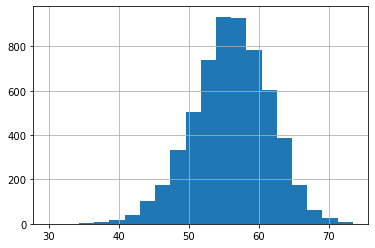

In [5]:
scores['buried_npsa_FAMILYVW_per_res'].hist(bins=20)
plt.show()

In [28]:
scores['percALA'].describe()

count    5837.000000
mean        0.103102
std         0.057027
min         0.000000
25%         0.065934
50%         0.083333
75%         0.134831
max         0.342466
Name: percALA, dtype: float64

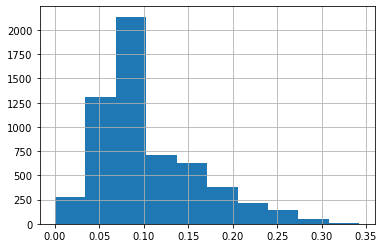

In [29]:
scores['percALA'].hist()

In [8]:
scores['nRES'].describe()

count    5837.000000
mean       87.277026
std         9.360526
min        59.000000
25%        81.000000
50%        87.000000
75%        94.000000
max       117.000000
Name: nRES, dtype: float64

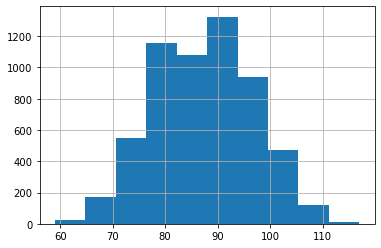

In [22]:
scores['nRES'].hist()

In [6]:
scores['score_per_res'].describe()

count    5837.000000
mean       -2.374643
std         0.160434
min        -2.960346
25%        -2.485952
50%        -2.381525
75%        -2.273750
max        -1.526440
Name: score_per_res, dtype: float64

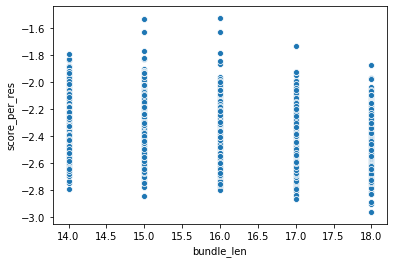

In [7]:
sns.scatterplot(x=scores['bundle_len'],y=scores['score_per_res'])

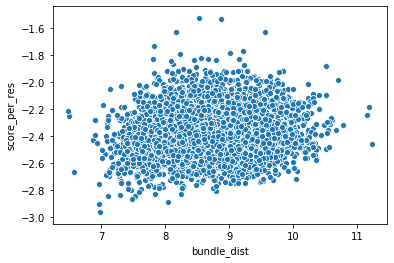

In [9]:
sns.scatterplot(x=scores['bundle_dist'],y=scores['score_per_res'])

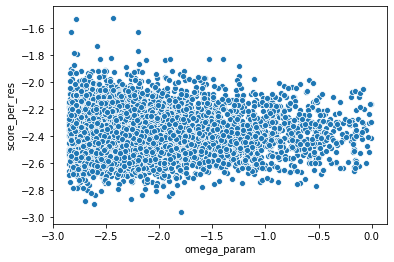

In [10]:
sns.scatterplot(x=scores['omega_param'],y=scores['score_per_res'])

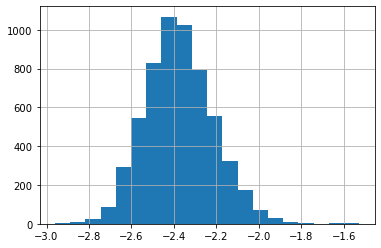

In [11]:
scores['score_per_res'].hist(bins=20)
plt.show()

In [12]:
scores['exposed_hydrophobics'].describe()


count    5837.000000
mean      228.794767
std        80.670249
min        24.988000
25%       170.754000
50%       223.345000
75%       279.962000
max       585.357000
Name: exposed_hydrophobics, dtype: float64

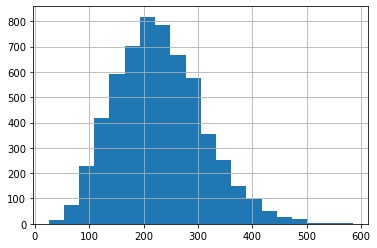

In [13]:
scores['exposed_hydrophobics'].hist(bins=20)
plt.show()

In [119]:
scores['holes'].describe()

count    5790.000000
mean       -1.151148
std         0.698458
min        -4.398000
25%        -1.614750
50%        -1.121000
75%        -0.679000
max         0.943000
Name: holes, dtype: float64

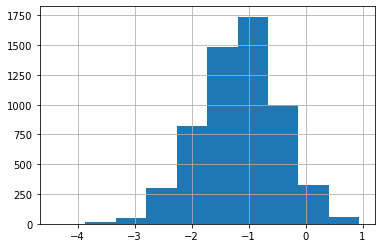

In [120]:
scores['holes'].hist()

## Only select the good ones 

In [30]:
scores1=scores[scores['buried_npsa_FAMILYVW_per_res'] >= 60]#>=80]
scores1.shape

(1394, 51)

In [31]:
scores2=scores1[scores1['score_per_res']<=-2.5]#-3.0]
scores2.shape


(619, 51)

In [32]:
scores3=scores2[scores2['percALA']<=0.1]
scores3.shape

(285, 51)

In [33]:
scores4=scores3[scores3['holes']<=0]
scores4.shape

(272, 51)

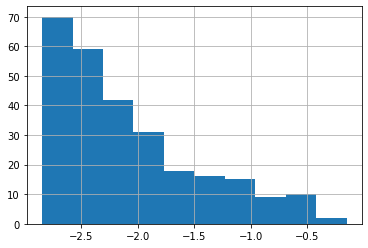

In [34]:
scores4['omega_param'].hist()

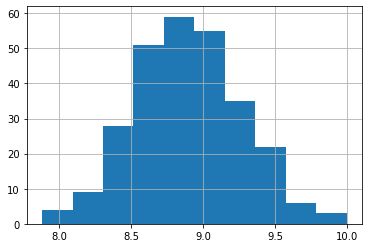

In [35]:
scores4['bundle_dist'].hist()

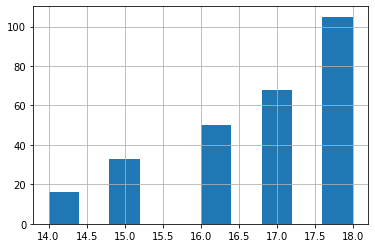

In [36]:
scores4['bundle_len'].hist()

In [199]:
type(scores4.index.values)

numpy.ndarray

In [210]:
lista=pd.DataFrame(scores4.index.values)
type(lista)

pandas.core.frame.DataFrame

In [212]:
lista.head()

,0
0,DHR20_DHR46_l3_h14_l2_t1_t3_r9_0001_0001_fd19
1,DHR21_DHR46_l2_t3_t3_0_v3_r11_0001_fd19
2,DHR72_DHR53_l3_h13_l2_t1_t1_2_v6c_r11_0001_000...
3,DHR20_DHR47_l2_t0_t2_D15_nTerm_2pt5x_r8_0001_0...
4,DHR20_DHR47_l2_h15_l4_t3_t3_0_v6c_r11_0001_000...


In [215]:
lista.to_csv('selection.csv', sep='\t',index=False)

In [80]:
for i in scores4['name']:
    print(f'cp batch1_layer/output_structures/{i}.pdb scratch_sele/ ;')

cp batch1_layer/output_structures/3h_14_1.274_9.047_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_1.181_8.915_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_1.841_9.06_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_1.007_8.396_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_1.971_7.951_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_2.059_9.413_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_2.137_7.419_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_2.0_8.705_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_0.704_9.119_looped_0001_0001.pdb scratch_sele/ ;
cp batch1_layer/output_structures/3h_14_2.464_8.567_looped_0001_0001.pdb scratch_sele/ ;
